In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import yfinance as yf
import datetime

In [2]:
data = yf.download('TSLA',start="2018-01-01") ## downloading stock price of Tesla 

[*********************100%***********************]  1 of 1 completed


In [3]:
data.head() #### first five value of stocks

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,20.799999,21.474001,20.733334,21.368668,21.368668,65283000
2018-01-03,21.400000,21.683332,21.036667,21.150000,21.150000,67822500
2018-01-04,20.858000,21.236668,20.378668,20.974667,20.974667,149194500
2018-01-05,21.108000,21.149332,20.799999,21.105333,21.105333,68868000
2018-01-08,21.066668,22.468000,21.033333,22.427334,22.427334,147891000


In [4]:
data.info() ### data information 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1263 entries, 2018-01-02 to 2023-01-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1263 non-null   float64
 1   High       1263 non-null   float64
 2   Low        1263 non-null   float64
 3   Close      1263 non-null   float64
 4   Adj Close  1263 non-null   float64
 5   Volume     1263 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 69.1 KB


In [5]:
#####splitng the data for train and validation 
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1263
Train data length : 884
Validation data lenth : 379


In [6]:
train_data = data[:length_train].iloc[:,:1] ### selecting open prices column from data frame
test_data = data[length_train:]
train_data

,Open
Date,
2018-01-02,20.799999
2018-01-03,21.400000
2018-01-04,20.858000
2018-01-05,21.108000
2018-01-08,21.066668
...,...
2021-06-30,226.589996
2021-07-01,227.973328
2021-07-02,226.326660


In [7]:
dataset_train = train_data.Open.values
dataset_train.shape ##### here checking the shape of the data(number of rows)

(884,)

In [8]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(884, 1)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(884, 1)

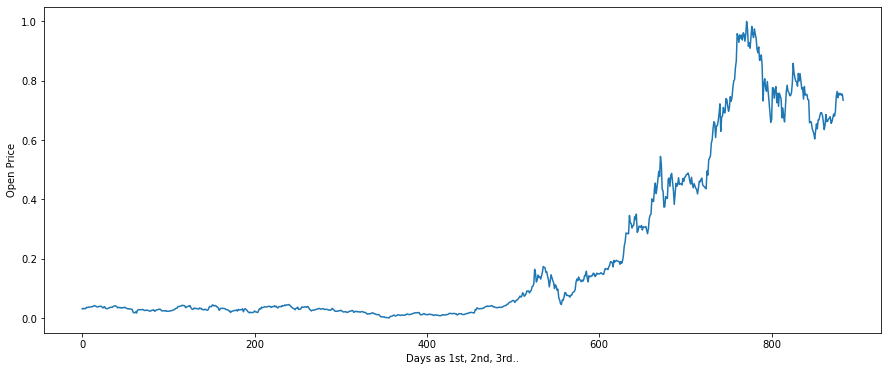

In [10]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [11]:
X_train = []
y_train = []

time_step = 20

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (864, 20)
Shape of y_train before reshape : (864,)


In [13]:
X_train = X_train.reshape((*X_train.shape, 1))
y_train = y_train.reshape((*y_train.shape, 1))

In [14]:
X_train[0]

array([[0.03061415],
       [0.03271902],
       [0.03081762],
       [0.03169465],
       [0.03154966],
       [0.03603068],
       [0.03533842],
       [0.03604939],
       [0.03684223],
       [0.0365873 ],
       [0.03727256],
       [0.0384887 ],
       [0.03833201],
       [0.03936105],
       [0.04184012],
       [0.04057252],
       [0.03909678],
       [0.03751345],
       [0.03712756],
       [0.03836475]])

In [15]:
y_train[0]

array([0.03891903])

In [16]:
from keras.models import Sequential
from keras.layers import Activation, Dense

In [17]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(20,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(20, return_sequences= False))
model_lstm.add(Dense(20))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 50, batch_size = 20)

Epoch 1/50
44/44 [==============================] - 7s 33ms/step - loss: 0.0252 - accuracy: 0.0023 0s - loss: 0.0289 - accuracy
Epoch 2/50
44/44 [==============================] - 1s 33ms/step - loss: 0.0014 - accuracy: 0.0023
Epoch 3/50
44/44 [==============================] - 1s 33ms/step - loss: 0.0013 - accuracy: 0.0023
Epoch 4/50
44/44 [==============================] - 1s 32ms/step - loss: 0.0013 - accuracy: 0.0023
Epoch 5/50
44/44 [==============================] - 1s 31ms/step - loss: 0.0011 - accuracy: 0.0023
Epoch 6/50
44/44 [==============================] - 1s 33ms/step - loss: 0.0012 - accuracy: 0.0023
Epoch 7/50
44/44 [==============================] - 1s 32ms/step - loss: 0.0015 - accuracy: 0.0023
Epoch 8/50
44/44 [==============================] - 1s 31ms/step - loss: 9.4701e-04 - accuracy: 0.0023
Epoch 9/50
44/44 [==============================] - 1s 32ms/step - loss: 8.7965e-04 - accuracy: 0.0023
Epoch 10/50
44/44 [==============================] - 1s 33ms/step - loss

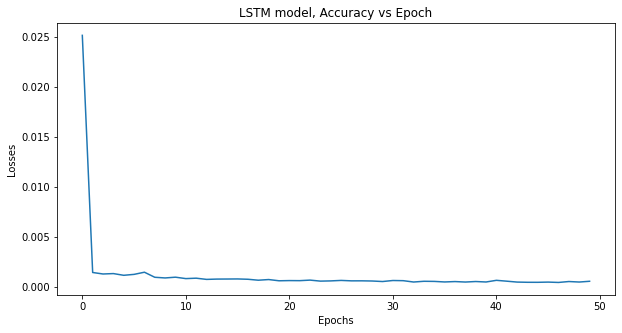

In [18]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

# Test Data

In [19]:
dataset_test = test_data.Open.values
dataset_test.shape

(379,)

In [20]:
dataset_test = np.reshape(dataset_test, (-1,1))
dataset_test.shape

(379, 1)

In [21]:
dataset_test_scaled = scaler.fit_transform(dataset_test)

In [22]:
X_test = []
y_test = []

time_step = 50

for i in range(time_step, len(dataset_test_scaled)):
    X_test.append(dataset_test_scaled[i-time_step:i,0])
    y_test.append(dataset_test_scaled[i,0])
    
# convert list to array
X_test, y_test = np.array(X_test), np.array(y_test)

In [23]:
X_test = X_test.reshape((*X_test.shape, 1))
y_test = y_test.reshape((*y_test.shape, 1))

In [24]:
test_prediction = scaler.inverse_transform(model_lstm.predict(X_test))
test_real = scaler.inverse_transform(y_test)

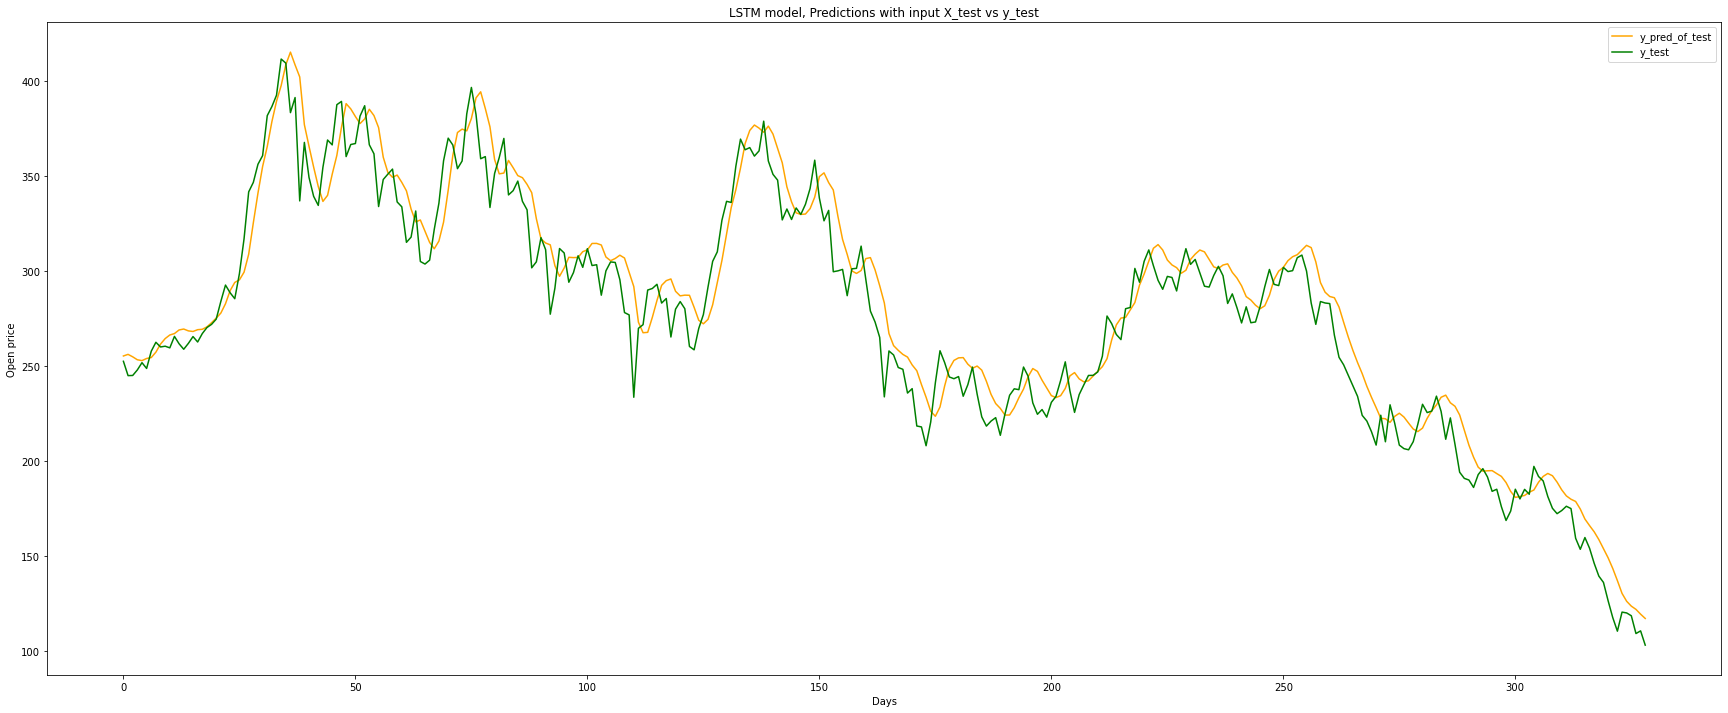

In [25]:
plt.subplots(figsize =(30,12))
plt.plot(test_prediction, label = "y_pred_of_test", c = "orange" )
plt.plot(test_real, label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()